In [2]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import pathlib
from scipy import interpolate as interp
from scipy import integrate as integ
import pythtb as pytb
import scipy.linalg as la
import astropy as aspy

import sim_tb as stb
import bz_utilities as bzu
import toy_models as toy
import plot_utils as pltu
import linear_response as lr
import analytical_models as amod
ROOT_DIR = "/home/orion178/Desktop/Projects_Rodrigo/"

In [3]:
alpha, B = 1.69, 0.07
kmax = 0.1*2
lamb = 0.0
th, phi = np.pi/2, 0
path = amod.create_path_rashba_model("", alpha, B=B, th=th, phi=phi, lamb=lamb)
Sim_rash = amod.Rashba_model(path, alpha, B=B, th=th, phi=phi, lamb=lamb)

#Sim_rash.create_bands_grid(kmax=kmax, nk=200)




E min = -222.0 meV
Es = -82.0 meV
Ed = 8.0 meV
Regime: 4.352152380952379


<IPython.core.display.Javascript object>


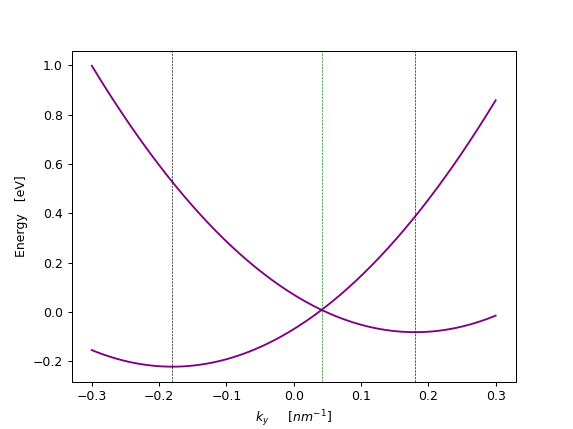

kd = 0.04142011834319527


In [14]:
def print_mssg(alpha, B):
    factor = 3/0.32
    e_min= - alpha**2  /factor / 2 - B
    e_s = - alpha**2  / factor / 2 + B
    e_d = factor / 2 * (B/alpha)**2
    print("E min = {} meV".format(np.round(e_min*1e3)))
    print("Es = {} meV".format(np.round(e_s*1e3)))
    print("Ed = {} meV".format(np.round(e_d*1e3)))

print_mssg(alpha, B)
critiq = alpha**2/B / (3/0.32)
print("Regime: {}".format(critiq))
#np.min(Sim_rash.bands_grid[1,:,:])*1e3
fig, ax = plt.subplots()

Sim_rash.plot_bands_1d(ax, nk=200, kmax=0.3)
kd = B/alpha
print("kd = {}".format(kd))
ks = alpha / 3*0.32
ax.axvline(x=ks, ls="--", color="black", lw=0.5)
ax.axvline(x=-ks,  ls="--", color="black", lw=0.5)
ax.axvline(x=kd,  ls="--", color="green", lw=0.5)

<IPython.core.display.Javascript object>


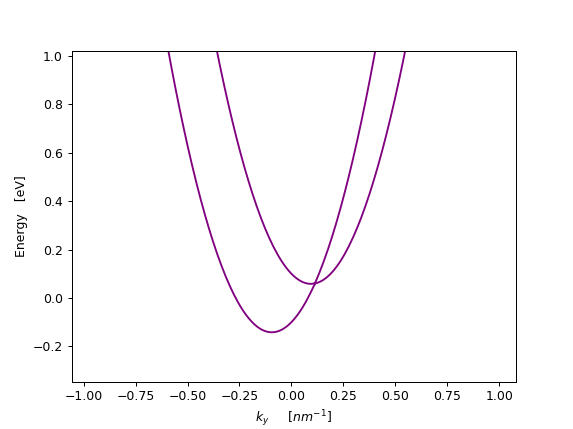

<IPython.core.display.Javascript object>


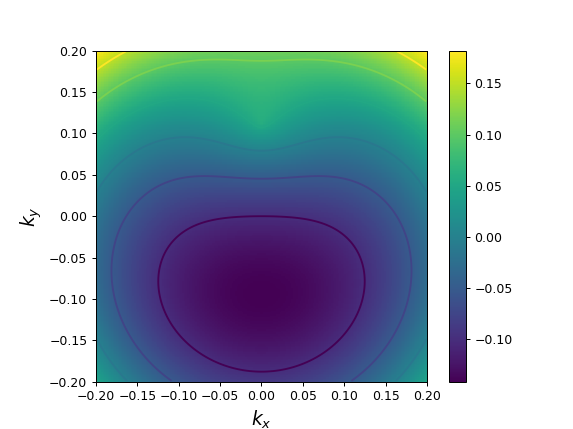

<IPython.core.display.Javascript object>


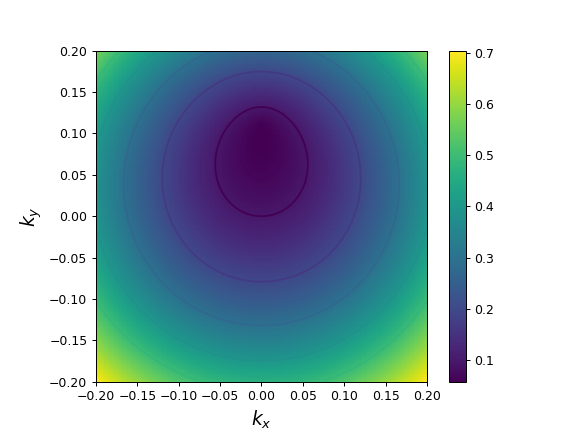

In [36]:
fig, ax = plt.subplots()
Sim_rash.plot_bands_2d(fig, ax, 0, kmax=kmax, cmap="viridis")

fig2, ax2 = plt.subplots()
Sim_rash.plot_bands_2d(fig2, ax2, 1, kmax=kmax, cmap="viridis")


plt.show()

In [3]:
components = (2,0,1)
Gamma = 12.7e-3 # 12.7 meV
Ef = 0.0
kmax = 1
kx = np.linspace(-kmax, kmax, 100)
s_cond = np.zeros_like(kx)
s_cond2 = np.zeros_like(kx)
for i in range(100):
    s_cond[i] = Sim_rash.spin_conductivity_k(kx[i], 0, Ef, *components, Gamma)
    s_cond2[i] = Sim_rash.spin_conductivity_k(0, kx[i], Ef, *components, Gamma)
    
fig, ax = plt.subplots()
ax.plot(kx, s_cond)
ax.plot(kx, s_cond2)

NameError: name 'Sim_rash' is not defined

In [42]:
Ef = 0
Gamma = 12.7e-3
res = Sim_rash.spin_conductivity(Ef, 1,0,1, Gamma, kmax=1)
res

/home/orion178/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:881: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  **opt)


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


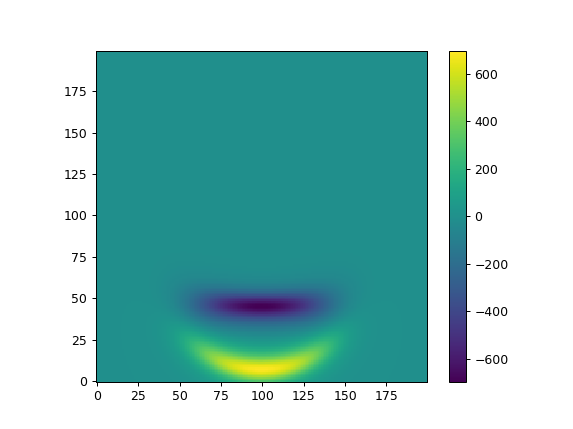

extent:  [-0.5, 0.5, -0.5, 0.5]
sigma_yxy -0.20134890020308865


In [33]:
Ef = -214e-3#-79.6e-3
Gamma = 12.7e-3
kmax = 0.5
nk = 200
#k = np.linspace(-kmax, kmax, nk)
#kx, ky = np.meshgrid(k,k)
kx_min, kx_max, ky_min, ky_max = limits_k_occup(Ef, alpha, B, 0, factor=1.1)
kkx = np.linspace(kx_min, kx_max, nk)
kky = np.linspace(ky_min, ky_max, nk)
kx, ky = np.meshgrid(kkx, kky)

s_cond = np.zeros_like(kx)
for x in range(nk):
    for y in range(nk):
        s_cond[x,y] = Sim_rash.spin_conductivity_k(kx[x,y], ky[x,y], Ef, 1,0,1, Gamma)
        
        
        
fig, ax = plt.subplots()

extent = [-kmax, kmax, -kmax, kmax]
print("extent: ", extent)
img = ax.imshow(s_cond, origin="lower", cmap="viridis")#, extent = extent)
plt.colorbar(img)

integ_s_cond = integ.simps([integ.simps(s_cond_1d,kky) for s_cond_1d in s_cond],kkx)
print("sigma_yxy",integ_s_cond)

In [ ]:
0.227677018881561



4.93293622 # conductivity at Ef=Es = -79.7meV

<IPython.core.display.Javascript object>


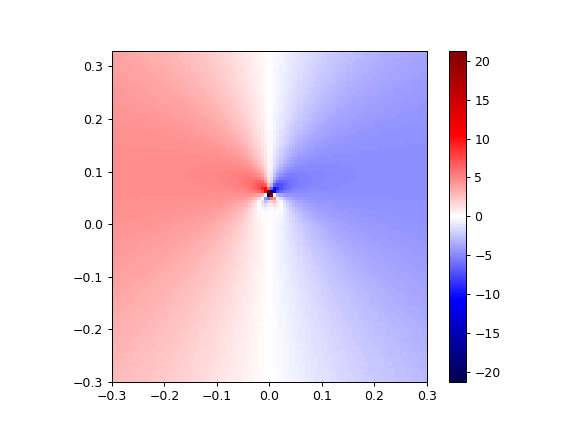

In [132]:
kx, ky = 0.0, 0.0
i, n = 0, 0

kmax = 0.3
nk = 100
k = np.linspace(-kmax, kmax, nk)
kx, ky = np.meshgrid(k,k)
vorticity = np.zeros_like(kx)
s_current = np.zeros_like(kx)
for x in range(nk):
    for y in range(nk):
        vorticity[x,y] = Sim_rash.vorticity(kx[x,y], ky[x,y], i, n)
        #s_current[x,y] = Sim_rash.spin_current(kx[x,y], ky[x,y], n, i, 1)
        
fig, ax = plt.subplots()
extent = [-kmax, kmax, -kmax, kmax*1.1]
img = ax.imshow(vorticity, origin="lower", cmap="seismic", extent = extent)
plt.colorbar(img)


## Testing analytical expresions for vorticity
## Comparing against numercial integration of spin conductivity.
## Function defined here estimate manually the size of the Fermi surface.

In [35]:
def k_fermi(Ef, alpha, B, signs=(-1,-1,1)):
    s1, s2, s3 = signs
    A = 3 / 0.32
    kd = B / alpha
    kmin = alpha / A
    discr = 1+2*(Ef/(alpha*kmin) + s3*kd/kmin)
    if discr <0:
        s1, s2, s3 = (1, 1, 1)
        discr = 1+2*(Ef/(alpha*kmin) + s3*kd/kmin)
    factor = (s1 + s2*np.sqrt(discr))
    return kmin * factor

def limits_k_occup(Ef, alpha, B, band, factor=1.1):
    signs = {
        0:((-1, -1, 1),(1,1,-1)),
        1:((1,-1,-1),(-1,1,1))}[band]
    sign1, sign2 = signs
    k1 = k_fermi(Ef, alpha, B, signs=sign1)
    k2 = k_fermi(Ef, alpha, B, signs=sign2)
    #print(k1,k2)
    center = 0.5*(k1+k2)
    diameter = np.abs(k2-k1)*factor
    kx_min, kx_max = -diameter/2, diameter/2
    ky_min, ky_max = center -diameter/2, center + diameter/2
    limits = (kx_min, kx_max, ky_min, ky_max)
    A = 3 / 0.32
    e_d =  0.5*A* (B/alpha)**2
    e_min =  - 0.5 * alpha**2  /A - B
    if band==1 and Ef < e_d:
        limits = (-1,1,-1,1)
    if band==0 and Ef<e_min:
        limits = (-1,1,-1,1)
    return limits

def spin_conductivity(Sim_rash, Ef, component,nk=200, Gamma=12.7e-3):
    """
    Calculate the spin conductivity integrating ina regular k-grid.
    """
    kx_min, kx_max, ky_min, ky_max = limits_k_occup(Ef, Sim_rash.alpha, Sim_rash.B, 0, factor=1.5)
    kkx = np.linspace(kx_min, kx_max, nk)
    kky = np.linspace(ky_min, ky_max, nk)
    kx, ky = np.meshgrid(kkx, kky)
    s_cond = np.zeros_like(kx)
    for x in range(nk):
        for y in range(nk):
            s_cond[x,y] = Sim_rash.spin_conductivity_k(kx[x,y], ky[x,y], Ef, *component, Gamma)
    integ_s_cond = integ.simps([integ.simps(s_cond_1d,kky) for s_cond_1d in s_cond],kkx)
    return integ_s_cond

def integrated_omega_y(Ef, alpha, B, band, nk=200, integration="simps"):
    """
    Integrate vorticity of spin current y. From analytical expression.
    """
    Rashba = amod.Analytical_Rashba_model(alpha, B, 0.0)
    kx_min, kx_max, ky_min, ky_max = limits_k_occup(Ef, alpha, B, band)
    kkx = np.linspace(kx_min, kx_max, nk)
    kky = np.linspace(ky_min, ky_max, nk)
    kx, ky = np.meshgrid(kkx, kky)
    omega = np.zeros_like(kx)
    for x in range(nk):
        for y in range(nk):
            energies = Rashba.rashba_energy(kx[x,y], ky[x,y])
            nF = bzu.fermi_dist(energies[band], Ef)
            omega[x,y] = nF * Rashba.omega_y(kx[x,y], ky[x,y], band)
    
    integ_simps = integ.simps([integ.simps(omega_1d,kky) for omega_1d in omega],kkx)
    dk2 = (kkx[1]-kkx[0]) * (kky[1] - kky[0])
    integ_rect = np.sum(omega) * dk2
    integ_omega = {"simps": integ_simps, "rect":integ_rect}[integration]
    return integ_omega

<IPython.core.display.Javascript object>


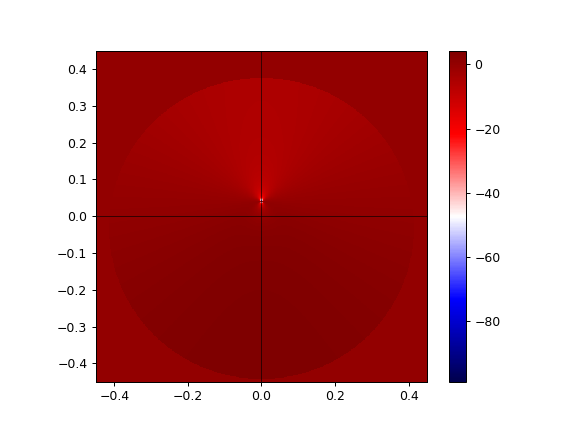

[-0.45, 0.45, -0.45, 0.45]
Inegral of SCV: 0.1968091613970337


In [59]:
band = 0
Ef = 100e-3

sgn_band = {0:-1, 1:1}[band]
nk= 600
kx_min, kx_max, ky_min, ky_max = limits_k_occup(Ef, alpha, B, band)
#print(kx_min, kx_max, ky_min, ky_max)
#kkx = np.linspace(kx_min, kx_max, nk)
#kky = np.linspace(ky_min, ky_max, nk)
#kx, ky = np.meshgrid(kkx, kky)
kmax = 0.45
k = np.linspace(-kmax, kmax, nk)
kx, ky = np.meshgrid(k, k)
omega = np.zeros_like(kx)
chi = np.zeros_like(kx)
Rashba = amod.Analytical_Rashba_model(alpha, B, 0.0)
for x in range(nk):
    for y in range(nk):
        energies = Rashba.rashba_energy(kx[x,y], ky[x,y])
        nF = bzu.fermi_dist(energies[band], Ef)
        omega[x,y] = nF * Rashba.omega_y(kx[x,y], ky[x,y], band)
        #chi[x,y] = np.imag(chi_k(kx[x,y], ky[x,y], alpha, B, phi))
        
integ_omega = integ.simps([integ.simps(omega_1d,k) for omega_1d in omega],k)
            
fig, ax = plt.subplots()
extent = [-kmax, kmax, -kmax, kmax]
print(extent)
img = ax.imshow(omega, origin="lower", cmap="seismic", extent = extent)
ax.axvline(color="black",lw=0.5)
ax.axhline(color="black",lw=0.5)

#k1 ,k2 = limits_k_occup(Ef, alpha, B, band)
#ax.scatter([0,0], [ky_min, ky_max], color="white")

plt.colorbar(img)

#dk = k[1]-k[0]
#integ_omega = np.sum(omega) * dk**2

print("Inegral of SCV: {}".format(integ_omega))

if False:
    fig2, ax2 = plt.subplots()
    extent = [-kmax, kmax, -kmax, kmax]
    img = ax2.imshow(chi, origin="lower", cmap="seismic", extent = extent)
    ax2.axvline(color="black",lw=0.5)
    ax2.axhline(color="black",lw=0.5)
    ax2.set_xlabel("$k_x$ [$nm^{-1}$]", fontsize=15)
    ax2.set_ylabel("$k_y$   [$nm^{-1}$]", fontsize=15)
    ax2.set_title("$Im(\chi(\mathbf{k}))$")
    plt.colorbar(img)

### Analytical spin current against Ef

/home/orion178/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


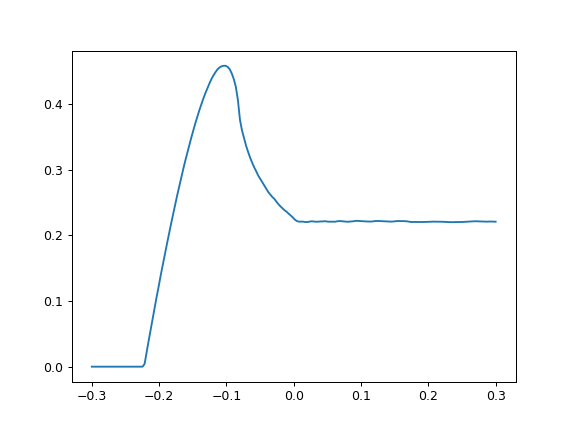

No handles with labels found to put in legend.


In [16]:
nE = 200
nk = 200
Ef_arr = np.linspace(-0.3, 0.3, nE)

omega_arr_simps = np.zeros_like(Ef_arr)

for i in range(nE):
    Ef = Ef_arr[i]
    omega_bottom = integrated_omega_y(Ef, alpha, B, 0, nk=nk)
    omega_top = integrated_omega_y(Ef, alpha, B, 1, nk=nk)
    omega_arr_simps[i] = omega_bottom + omega_top
    
c = 0.0002423331459
fig, ax = plt.subplots()
ax.plot(Ef_arr, omega_arr_simps)
ax.legend(frameon=False)
plt.show()

### Numerical spin current against Ef

In [ ]:
def spin_conductivity_vs_Ef(Sim_rash, component, Gamma, nE=50, nk=200):
    Ef_arr = np.linspace(-0.3, 0.3, nE)
    s_cond = np.zeros_like(Ef_arr)
    for i in range(nE):
        Ef = Ef_arr[i]
        s_cond[i] = spin_conductivity(Sim_rash, Ef, component,nk=nk, Gamma=Gamma)
    return Ef_arr, s_cond
    

save = True
load = False
Gamma_arr = np.array([12.7e-3, 20e-3, 30e-3, 40e-3, 50e-3])
fig, ax = plt.subplots()
for Gamma in Gamma_arr:
    str_G = np.round(Gamma*1e3, decimals=2)
    ending = "Gamma={}meV.npy".format(str_G)
    if not(load):
        Ef_arr, s_cond = spin_conductivity_vs_Ef(Sim_rash, (1,0,1), Gamma)
    else:
        s_cond = np.load(Sim_rash.path / "s_cond_yxy_{}".format(ending))
        Ef_arr = np.load(Sim_rash.path / "Ef_arr_{}".format(ending))
    ax.plot(Ef_arr, s_cond, label=r"$\Gamma={}$  meV".format(Gamma*1000), marker="*")

    if save:
        np.save(Sim_rash.path / "s_cond_yxy_{}".format(ending), s_cond)
        np.save(Sim_rash.path / "Ef_arr_{}".format(ending), Ef_arr)
#c = 0.0002423331459

ax.legend(frameon=False)
plt.show()

<IPython.core.display.Javascript object>

/home/orion178/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


### Fixing units of analytical plot

<IPython.core.display.Javascript object>


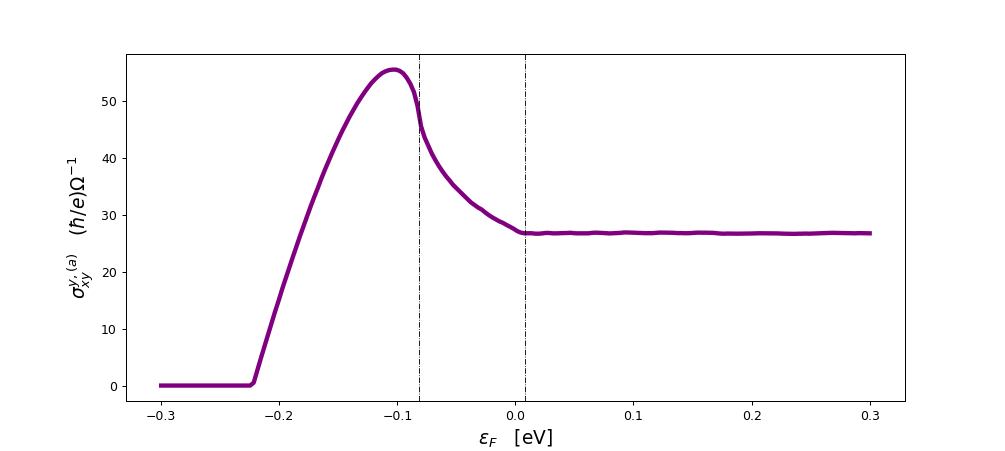

In [47]:
dir = toy.ROOT_DIR + "rashba_model/integrated_SCV/"
#np.save(dir + "Ef_arr.npy",Ef_arr)
#np.save(dir + "omega_arr.npy", omega_arr_simps)


c = 0.0002423331459 * 1e6 /2 #/ (2*np.pi) / 2
fig, ax = plt.subplots()
ax.plot(Ef_arr, c * omega_arr_simps, color="purple", lw=3.5)
#ax.legend(frameon=False)
ax.set_xlabel(r"$\varepsilon_{F}$   [eV]", fontsize=15)
ax.set_ylabel(r"$\sigma^{y, (a)}_{xy}$   $(\hbar / e)\Omega^{-1}$", fontsize=15)
ax.axvline(x=8e-3, color="black", lw=0.7, ls="-.")
ax.axvline(x=-82e-3, color="black", lw=0.7, ls="-.")
plt.show()

In [22]:
e = 1.602176e-19
hbar = 6.5821195e-16

Gamma = 12.7e-3
c = 1 / (8*np.pi**2 * Gamma) * 2.43e-4
c

0.00024233314591622128